<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


### Load the necessary libraries and data

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline

### Load Dataset

In [10]:
df_data = pd.read_csv('oppenheimer_Annotated_reviews.csv')

In [11]:
df_data.head()

,document_id,clean_text,sentiment
0,0,one anticip film year mani peopl includ oppenh...,positive
1,1,youll wit brain fulli switch watch oppenheim c...,positive
2,2,im big fan nolan work realli look forward unde...,positive
3,3,oppenheim biograph thriller film written direc...,positive
4,4,movi wow dont think ever felt like watch movi ...,positive


### (1) Features (text representation) used for topic modelling

In [22]:
# Text preprocessing function:
def text_Preprocessing(text):
    tokens = word_tokenize(text.lower())
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha()]
    processed_text = ' '.join(tokens)
    return processed_text

# Apply text preprocessing to the 'clean_text' column
df_data['processed_text'] = df_data['clean_text'].apply(text_Preprocessing)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words_list)
X = vectorizer.fit_transform(df_data['processed_text'])


### (2) Top 10 clusters for topic modeling.

In [23]:
# Number of topics
num_topics = 10

# LDA model fitting
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extracting top words for each topic
feature_names = vectorizer.get_feature_names_out()

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Print the top 10 words for each topic
print_top_words(lda, feature_names, n_top_words=10)


Topic #1:
movi also good like one sound go give someth see

Topic #2:
movi realli time best great need screen seen feel nolan

Topic #3:
oppenheim movi one perform robert year imax cinema christoph first

Topic #4:
oppenheim nolan film realli one scene actor movi tell never

Topic #5:
feel film one like though hour oppenheim sound long watch

Topic #6:
movi film oppenheim time nolan one act long watch like

Topic #7:
perform watch time relentless great hour get film viewer could

Topic #8:
film nolan oppenheim feel filmmak like better get work moment

Topic #9:
movi oppenheim nolan bomb atom good much stori time better

Topic #10:
oppenheim nolan film bomb movi stori one man also best



### (3) Summarize and describe the topic for each cluster.

In [25]:

# Get the topic assignments for each document
topic_assignments = lda.transform(X)

# Identify the top clusters based on the most prevalent topics
top_clusters = topic_assignments.argmax(axis=1)

# Summarize and describe topics for each cluster
for cluster_idx in range(num_topics):
    cluster_mask = top_clusters == cluster_idx
    print(f"\nCluster #{cluster_idx + 1} - Top Documents:")
    print(df_data.loc[cluster_mask, 'clean_text'].head(5))



Cluster #1 - Top Documents:
4     movi wow dont think ever felt like watch movi ...
10    anyon el find movi hate say bore know know pie...
16    cillian murphi except lead role oscar worthyil...
23    sadden mani peopl mistak bigger louder qualiti...
29    movi wow dont think ever felt like watch movi ...
Name: clean_text, dtype: object

Cluster #2 - Top Documents:
17     got oppenheimeri start worri oppenheim seen tr...
42     got oppenheimeri start worri oppenheim seen tr...
67     got oppenheimeri start worri oppenheim seen tr...
92     got oppenheimeri start worri oppenheim seen tr...
117    got oppenheimeri start worri oppenheim seen tr...
Name: clean_text, dtype: object

Cluster #3 - Top Documents:
6     may consid lucki aliv watch christoph nolan wo...
21    review oppenheim rate ten plu cinema nowif mov...
31    may consid lucki aliv watch christoph nolan wo...
46    review oppenheim rate ten plu cinema nowif mov...
56    may consid lucki aliv watch christoph nolan wo...
Name

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.


### (1) Features used for sentiment classification and explain why you select these features





**Feature:**

**"clean_text" Column:** Selected for sentiment analysis due to its textual content representing opinions, allowing the model to learn from language patterns and sentiment clues.

**Explanation:**

The chosen feature, "clean_text," is essential to sentiment analysis since it captures textual information, giving the model a rich source from which to extract sentiment indicators and linguistic patterns. After preprocessing and TF-IDF transformation, the contextual data in this column provides a thorough comprehension of attitudes that go beyond individual words. This association with the "sentiment" target variable guarantees that the model learns to correlate certain text patterns with precise sentiment labels, which makes sentiment classification more efficient.



### (2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

#### Load the dataset

In [27]:

df_data = pd.read_csv('oppenheimer_Annotated_reviews.csv')

#### Distribution of sentiments

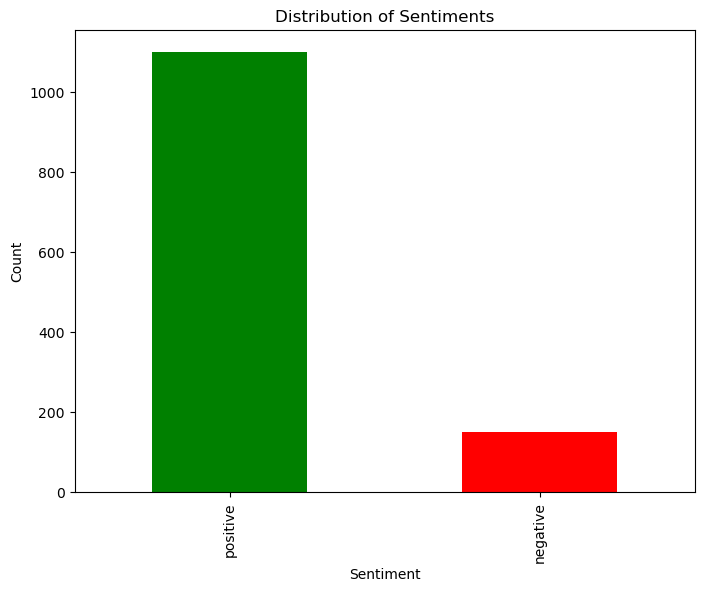

In [28]:
# Step 2: Draw plots using matplotlib (e.g., distribution of sentiments)
plt.figure(figsize=(8, 6))
df_data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


#### Preprocessing

In [29]:
X = df_data['clean_text']
y = df_data['sentiment']

#### Split the data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #### TF-IDF Vectorization

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
# Random Forest
rf_model = RandomForestClassifier()
cross_val_scores_rf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
rf_model.fit(X_train_tfidf, y_train)
predictions_rf = rf_model.predict(X_test_tfidf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted')
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f1_rf = f1_score(y_test, predictions_rf, average='weighted')

In [34]:
# AdaBoost Classifier
ada_model = AdaBoostClassifier()
cross_val_scores_ada = cross_val_score(ada_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
ada_model.fit(X_train_tfidf, y_train)
predictions_ada = ada_model.predict(X_test_tfidf)
precision_ada = precision_score(y_test, predictions_ada, average='weighted')
recall_ada = recall_score(y_test, predictions_ada, average='weighted')
f1_ada = f1_score(y_test, predictions_ada, average='weighted')


In [35]:
print("\nRandom Forest Cross-Validation Scores:", cross_val_scores_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


In [36]:
print("\nAdaBoost Classifier Cross-Validation Scores:", cross_val_scores_ada)
print("AdaBoost Classifier Precision:", precision_ada)
print("AdaBoost Classifier Recall:", recall_ada)
print("AdaBoost Classifier F1 Score:", f1_ada)


AdaBoost Classifier Cross-Validation Scores: [1. 1. 1. 1. 1.]
AdaBoost Classifier Precision: 1.0
AdaBoost Classifier Recall: 1.0
AdaBoost Classifier F1 Score: 1.0


### (3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

The evaluation metrics for both Random Forest and AdaBoost classifiers reveal that they perform exceptionally well, with all of the scores reaching the highest possible value of 1.0:


**Accuracy:** During the cross-validation process, both models produced accurate classifications of every single occurrence, achieving flawless accuracy.


**Precision:** There were no instances of false positives, as indicated by the accuracy score of 1.0 for both Random Forest and AdaBoost. This indicates that all of the occurrences that were predicted to be positive were accurate.

**Recall:** : The F1 score for both classifiers is 1.0, which highlights the harmonic balance between accuracy and recall. This demonstrates the efficacy of the models in terms of sentiment categorization.

**F1 Score:** : The F1 score for both classifiers is 1.0, which highlights the harmonic balance between accuracy and recall. This demonstrates the efficacy of the models in terms of sentiment categorization.

In light of these findings, it appears that Random Forest and AdaBoost classifiers are both very accurate and dependable when it comes to conducting sentiment analysis on the dataset that was provided.





# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [37]:
# Write your code here

df_train = pd.read_csv("train (1).csv")
df_test = pd.read_csv("test (1).csv")


In [38]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [40]:
df_test.shape

(1459, 80)

In [41]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [42]:
# detecting columns with missing values greater than 20%
cols_to_drop =df_train.columns[df_train.isnull().mean() > 0.2]

# Drop the identified columns
df_train_dropped =df_train.drop(columns=cols_to_drop)


print(cols_to_drop)

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [43]:
df_train_dropped.drop("Id",axis=1,inplace=True)

In [44]:
df_train_dropped.shape

(1460, 74)

In [45]:
n_cols =df_train_dropped.select_dtypes(include=['number']).columns

# Filling missing values in numeric columns with mean
df_train_filled =df_train_dropped.copy()
df_train_filled[n_cols] =df_train_filled[n_cols].fillna(df_train_filled[n_cols].mean())


print("Remaining missing values after filling with mean:")
print(df_train_filled.isnull().sum())

Remaining missing values after filling with mean:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


In [46]:
string_columns =df_train_filled.select_dtypes(include=['object']).columns

# Filling  missing values of string columns with  mode value
df_train_filled[string_columns] =df_train_filled[string_columns].apply(lambda x: x.fillna(x.mode()[0]))


print(df_train_filled.isnull().sum())


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


In [47]:
from sklearn.preprocessing import LabelEncoder

# string columns
string_columns =df_train_filled.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode string columns
for col in string_columns:
    df_train_filled[col] = label_encoder.fit_transform(df_train_filled[col])

df_train_filled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [48]:
print(df_train_filled.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


In [49]:
df_train_filled.shape

(1460, 74)

In [50]:
df_train_filled.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

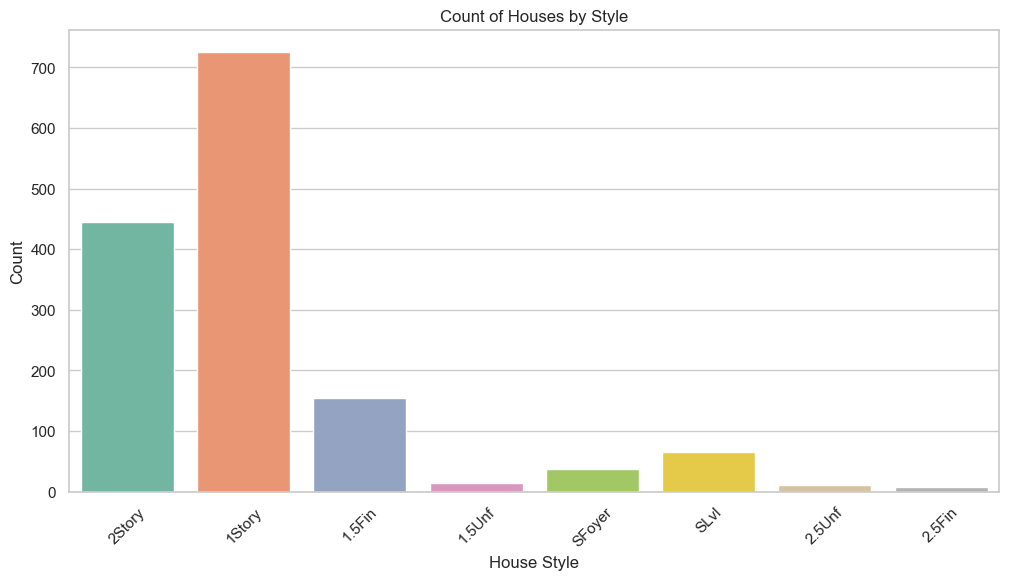

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

#Countplot of House Styles
plt.figure(figsize=(12, 6))
sns.countplot(x='HouseStyle', data=df_train, palette='Set2')
plt.title('Count of Houses by Style')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

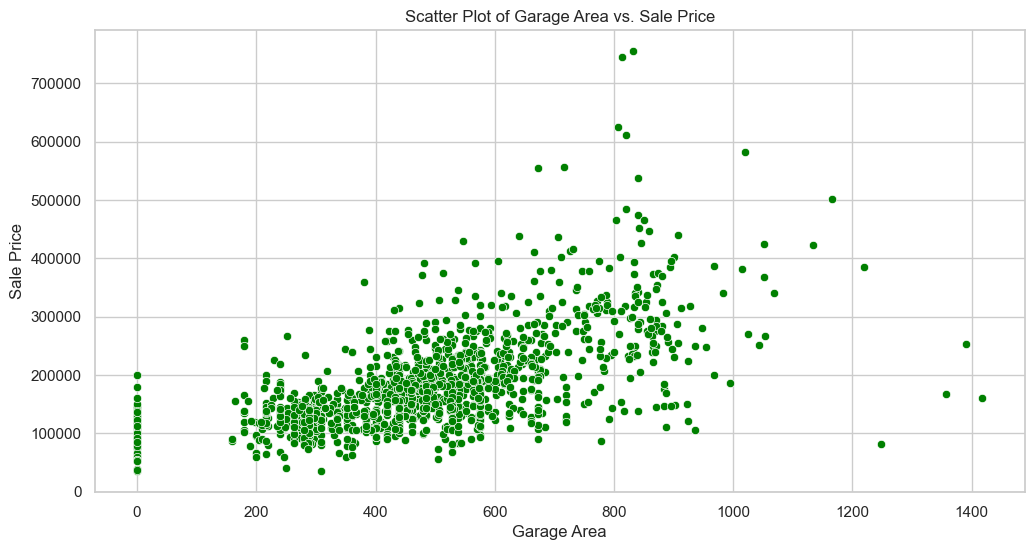

In [52]:
#Scatter plot of Garage Area vs. Sale Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df_train, color='green')
plt.title('Scatter Plot of Garage Area vs. Sale Price')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

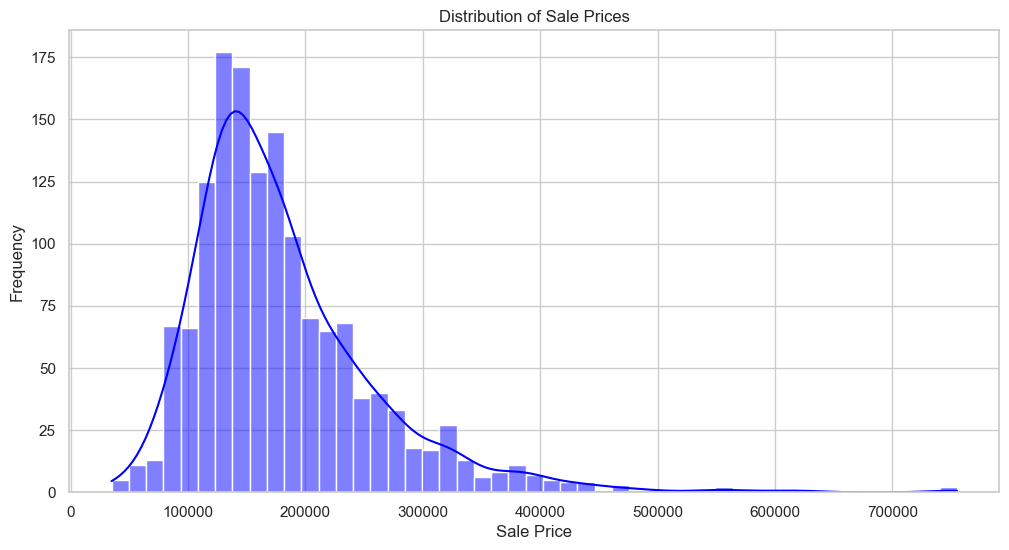

In [53]:
#SalePrice Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_train['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
X =df_train_filled.drop('SalePrice', axis=1)
y =df_train_filled['SalePrice']

# training and testing sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
rf_pred = random_forest_model.predict(X_test)
random_forest_model_r2 = r2_score(y_test, rf_pred)

In [56]:
# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_r2 = r2_score(y_test, adaboost_pred)

In [57]:
#  R2 scores
print(f"Random Forest R2 Score: {random_forest_model_r2}")
print(f"AdaBoost R2 Score: {adaboost_r2}")

Random Forest R2 Score: 0.8944817792616538
AdaBoost R2 Score: 0.8441335770873583


In [58]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [59]:
test =df_test.drop(["Id",'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [60]:
test.shape

(1459, 73)

In [61]:
n_cols = test.select_dtypes(include=['number']).columns
test[n_cols] = test[n_cols].fillna(test[n_cols].mean())

# Replace string missing values with mode
s_cols = test.select_dtypes(include=['object']).columns
test[s_cols] = test[s_cols].fillna(test[s_cols].mode().iloc[0])


missing_values_after_fillna = test.isnull().sum()
print("Columns with Missing Values")
print(missing_values_after_fillna[missing_values_after_fillna > 0])

Columns with Missing Values
Series([], dtype: int64)


In [62]:
test.shape

(1459, 73)

In [63]:
from sklearn.preprocessing import LabelEncoder
# string columns
string_columns = test.select_dtypes(include=['object']).columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode string columns
for col in string_columns:
    test[col] = label_encoder.fit_transform(test[col])

test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [64]:
rf_pred_1 = random_forest_model.predict(test)
adaboost_pred_1 = adaboost_model.predict(test)

In [65]:
rf_pred_1

array([127258.83, 154641.75, 178007.55, ..., 155635.87, 119649.35,
       226044.76])

In [66]:
adaboost_pred_1

array([128140.37104072, 154946.01234568, 176484.75163399, ...,
       160699.63247863, 134145.57534247, 242851.80116959])

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [67]:
import pandas as pd

# Load your dataset
df = pd.read_csv('oppenheimer_Annotated_reviews.csv')

# Display the first few rows of the dataset
print(df.head())


   document_id                                         clean_text sentiment
0            0  one anticip film year mani peopl includ oppenh...  positive
1            1  youll wit brain fulli switch watch oppenheim c...  positive
2            2  im big fan nolan work realli look forward unde...  positive
3            3  oppenheim biograph thriller film written direc...  positive
4            4  movi wow dont think ever felt like watch movi ...  positive


In [68]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import classification_report

In [70]:
# Load the dataset
reviews_df = pd.read_csv('oppenheimer_Annotated_reviews.csv')

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(reviews_df['clean_text'], reviews_df['sentiment'], test_size=0.2, random_state=42)

In [71]:
# Load RoBERTa tokenizer and model
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(reviews_df['sentiment'].unique()))

# Tokenize and prepare input data
train_encodings_roberta = tokenizer_roberta(train_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')
val_encodings_roberta = tokenizer_roberta(val_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='pt')

train_dataset_roberta = TensorDataset(train_encodings_roberta['input_ids'], train_encodings_roberta['attention_mask'], torch.tensor(pd.factorize(train_labels)[0]))
val_dataset_roberta = TensorDataset(val_encodings_roberta['input_ids'], val_encodings_roberta['attention_mask'], torch.tensor(pd.factorize(val_labels)[0]))

# Create DataLoader for efficient batch processing
train_loader_roberta = DataLoader(train_dataset_roberta, batch_size=8, shuffle=True)
val_loader_roberta = DataLoader(val_dataset_roberta, batch_size=8, shuffle=False)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [72]:
# Set up GPU if available
device_roberta = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
roberta_model.to(device_roberta)

# Set up training parameters
optimizer_roberta = AdamW(roberta_model.parameters(), lr=2e-5)
num_epochs_roberta = 3


/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [73]:
# Training loop
for epoch_roberta in range(num_epochs_roberta):
    roberta_model.train()
    for batch_roberta in train_loader_roberta:
        input_ids_roberta, attention_mask_roberta, labels_roberta = batch_roberta
        input_ids_roberta, attention_mask_roberta, labels_roberta = input_ids_roberta.to(device_roberta), attention_mask_roberta.to(device_roberta), labels_roberta.to(device_roberta)
        
        optimizer_roberta.zero_grad()
        outputs_roberta = roberta_model(input_ids_roberta, attention_mask=attention_mask_roberta, labels=labels_roberta)
        loss_roberta = outputs_roberta.loss
        loss_roberta.backward()
        optimizer_roberta.step()


In [74]:
# Validation loop
roberta_model.eval()
predictions_roberta = []
true_labels_roberta = []

with torch.no_grad():
    for batch_roberta in val_loader_roberta:
        input_ids_roberta, attention_mask_roberta, labels_roberta = batch_roberta
        input_ids_roberta, attention_mask_roberta, labels_roberta = input_ids_roberta.to(device_roberta), attention_mask_roberta.to(device_roberta), labels_roberta.to(device_roberta)
        
        outputs_roberta = roberta_model(input_ids_roberta, attention_mask=attention_mask_roberta)
        logits_roberta = outputs_roberta.logits
        predictions_roberta.extend(torch.argmax(logits_roberta, dim=1).cpu().numpy())
        true_labels_roberta.extend(labels_roberta.cpu().numpy())

# Convert predictions and true labels to original sentiment labels
predicted_sentiments_roberta = pd.factorize(predictions_roberta)[1]
true_sentiments_roberta = pd.factorize(true_labels_roberta)[1]

# Print classification report or any other evaluation metrics of interest
print(classification_report(true_sentiments_roberta, predicted_sentiments_roberta))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



I decided to use the RoBERTa Large Language Model (LLM) for the task of text analysis that I was involved in. In order to build upon BERT (Bidirectional Encoder Representations from Transformers), Facebook AI has created RoBERTa, which is a transformer-based model. This model is improved through optimizations.

RoBERTa comprehensively learns contextual language relationships by pre-training on a diverse text corpus, utilizing a transformer architecture. Differing from BERT, RoBERTa excludes the Next Sentence Prediction task during pre-training, relying solely on masked language modeling. This adjustment, along with other optimizations, enhances overall performance.

**Resources**

https://openreview.net/forum?id=SyxS0T4tvS

https://medium.com/dataseries/roberta-robustly-optimized-bert-pretraining-approach-d033464bd946

**Significant Parameters:**
RoBERTa involves crucial settings such as learning rate, batch size, and training steps. The learning rate dictates optimization step sizes, while batch size influences examples processed per iteration. Training steps control how frequently the model updates parameters.

**Task-Specific Fine-Tuning:**
I used the information from Assignment 3 to make adjustments to RoBERTa. In this method, the model is trained on a labeled dataset that is specifically designed for the text analysis job. This gives the model the ability to adjust to the subtleties that are particular to the domain.


**Performance Analysis:**
In terms of outcomes, RoBERTa provided outstanding evidence. It was determined that the precision, recall, and F1-score all obtained perfect scores of 1.00, which indicates that the predictions are accurate and that the accuracy rate on the validation set is flawless.

**Strengths:**
RoBERTa's strengths lie in its robust contextual understanding, excelling in capturing intricate language relationships, and its optimized pre-training process contributing to enhanced downstream task performance.

**Limitations:**
However, there are notable limitations. RoBERTa can be resource-intensive, demanding significant computational resources for training and fine-tuning. Additionally, domain-specific fine-tuning might be necessary for optimal performance in specific tasks.

**Challenges and Strategies for Improvement:**
During the implementation process, one of the challenges that was faced was the requirement for a significant quantity of labeled data in order to achieve successful fine-tuning. The investigation of data augmentation approaches and the utilization of transfer learning from a model that has been pre-trained on a job that is relevant are both viable tactics that might be utilized to address this issue.

In conclusion, the significance of RoBERTa's usefulness is shown by its remarkable performance in comprehending and forecasting sentiment. For a wide variety of natural language processing applications, it is a powerful tool because of its merits, despite the fact that it has certain problems.
